<a href="https://colab.research.google.com/github/michaelprinc/ABSA_task/blob/main/ABSA_task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Hello,

first of all I would like to make a summary of my task. I have spent around 4 hours on this task with a help of ChatGPT. I have tried to make the process as much automated as possible for my own chalenge. Sometimes the automation does not pay back. The code is not well documented, because I did not find it productive.

Here are my findings:
Average age of the group before outlier cleaning was 9.624457e+06, after the cleaning it was 39.317003.
According to SHAP value dependence between candidate_id and age and assuming that candidate_id is increasing in time we can state that earlier candidates had higher probability to be admitted to job.
There can be an ageism (age discrimination). According to SHAP output we can state that older job applicants had higher probability to be hired and thus it is probable that the HR department or the company itself are discriminating according to age. It appears there is no racial discrimination at the company, but this is based solely on names of candidates, which can be a wrong indicator.
There is a lower probability that female candidate will be hires, when she has no children. This also indicates a possibility of a discrimination.

I am looking forward for your feedback.

Best regards,
Michael

In [ ]:
import zipfile

import pandas as pd

# specify the path to your zipped file
path_to_zipfile = '/content/drive/MyDrive/Data/interview_datasets.zip'

# create a ZipFile object from the zipped file
zip_file = zipfile.ZipFile(path_to_zipfile)

# create an empty list to hold the dataframes
dfs = []

# loop through each file in the archive
for file_name in zip_file.namelist():
    # read the file into a pandas dataframe

    try:
        # I load data and drop duplicates
        df = pd.read_csv(zip_file.open(file_name)).drop_duplicates()
        print(0)
        dfs.append(df)
    except:
        # try:
        #     df = pd.read_csv(zip_file.open(file_name), encoding='unicode_escape')
        #     print(1)
        #     dfs.append(df)
        # except:
        #     try:
        #         df = pd.read_csv(zip_file.open(file_name), encoding='latin-1')
        #         print(2)
        #         dfs.append(df)
        #     except:
        #         df = pd.read_csv(zip_file.open(file_name), encoding='utf-8')
        #         print(3)
        #         dfs.append(df)
        pass
    # append the dataframe to the list


0
0


In [ ]:
print(zip_file.namelist())

print(len(dfs))

['admissions.csv', 'candidates.csv', '__MACOSX/._candidates.csv']
2


In [ ]:
print(dfs[1].head())

              name  candidate_id   age  gender  no_children  emp_card_id
0        Geneva Le        928100  43.0  Female          NaN       7505.0
1    Marilyn Weber        913797  51.0    Male          0.0          NaN
2  Marlene Deweese        926775  30.0    Male          2.0          NaN
3    Lydia Martino        919847  31.0  Female          0.0          NaN
4     Donna Fisher        936127  24.0  Female          0.0          NaN


In [ ]:
def summary_proc(dfs):
    for i,df in enumerate(dfs):
        print(zip_file.namelist()[i])
        # get summary statistics for each column
        summary = df.describe()

        # print the summary statistics
        print(summary)
summary_proc(dfs)

admissions.csv
        candidate_id
count   49786.000000
mean   921357.500000
std     14372.124588
min    896465.000000
25%    908911.250000
50%    921357.500000
75%    933803.750000
max    946250.000000
candidates.csv
        candidate_id           age   no_children   emp_card_id
count   49786.000000  4.978600e+04  42439.000000  17422.000000
mean   921357.500000  4.317360e+04      1.052193   5009.653197
std     14372.124588  9.624457e+06      0.885225   2882.262292
min    896465.000000  1.100000e+01      0.000000      0.000000
25%    908911.250000  3.300000e+01      0.000000   2503.250000
50%    921357.500000  3.900000e+01      1.000000   5051.000000
75%    933803.750000  4.600000e+01      2.000000   7503.750000
max    946250.000000  2.147484e+09      4.000000   9999.000000


In [ ]:
# dfs[1].age.unique()

In [ ]:
def remove_outliers(dfs):
    import numpy as np
    from scipy.stats import zscore
    dfs_filtered = []
    for i,df in enumerate(dfs):
        print(df.describe())
        # print(zip_file.namelist()[i])
        df_orig = df
        
        # identify columns with numeric data
        numeric_columns = df.select_dtypes(include=[np.number]).columns
        
        # Impute values into dataframe using median
        df_imputed = df.fillna(df.median())
        
        df = df_imputed

        # calculate z-scores for each numeric column
        z_scores = df[numeric_columns].apply(zscore)

        # set threshold for flagging outliers
        threshold = 5 # I use less stricter threshold than default value 3, outliers has to be more deviated from a other values.

        # identify rows with outliers
        outlier_rows = list(np.unique(np.where(z_scores > threshold)[0]))
        
        print('Outlier rows:' + ','.format(", ".join(str(x) for x in outlier_rows)))
        print(outlier_rows)
        # remove rows with outliers
        df_filtered = df_orig.drop(outlier_rows)
        # Impute values into original dataframe without outliers excluding columns describing identification key
        cols_to_impute = df.columns[~df.columns.str.contains('id')]
        df_filtered[cols_to_impute] = df_filtered[cols_to_impute].fillna(df_filtered[cols_to_impute].median())
        # print(df.iloc[outlier_rows]) ### Check outlier_rows
        print(df_filtered.describe())
        dfs_filtered.append(df_filtered)
        
    return dfs_filtered

In [ ]:
dfs_filtered = remove_outliers(dfs)

        candidate_id
count   49786.000000
mean   921357.500000
std     14372.124588
min    896465.000000
25%    908911.250000
50%    921357.500000
75%    933803.750000
max    946250.000000
Outlier rows:,
[]
        candidate_id
count   49786.000000
mean   921357.500000
std     14372.124588
min    896465.000000
25%    908911.250000
50%    921357.500000
75%    933803.750000
max    946250.000000
        candidate_id           age   no_children   emp_card_id
count   49786.000000  4.978600e+04  42439.000000  17422.000000
mean   921357.500000  4.317360e+04      1.052193   5009.653197
std     14372.124588  9.624457e+06      0.885225   2882.262292
min    896465.000000  1.100000e+01      0.000000      0.000000
25%    908911.250000  3.300000e+01      0.000000   2503.250000
50%    921357.500000  3.900000e+01      1.000000   5051.000000
75%    933803.750000  4.600000e+01      2.000000   7503.750000
max    946250.000000  2.147484e+09      4.000000   9999.000000
Outlier rows:,
[27341]
        candid

<ipython-input-19-28ffd8c311c0>:14: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_imputed = df.fillna(df.median())
<ipython-input-19-28ffd8c311c0>:33: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_filtered[cols_to_impute] = df_filtered[cols_to_impute].fillna(df_filtered[cols_to_impute].median())
<ipython-input-19-28ffd8c311c0>:14: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_imputed = df.fillna(df.median())
<ipython-input-19-28ffd8c311c0>:33: FutureWarning: Dropping of nuisan

In [ ]:
# I join all tables in the array of dataframes, I drop all rows with a missing candidate_id to keep only records which make sense and to get rid of duplicates
for i,df in enumerate(dfs_filtered):
    if i == 0:
        df_joined = df.dropna(subset=['candidate_id']) 
    else:
        df_joined = pd.merge(df_joined, df.dropna(subset=['candidate_id']) \
       , on='candidate_id', how='inner')


In [ ]:
df_joined.head()

candidate_id department     admit               name   age  gender  \
0        933951          E  Rejected     Chester Joshua  43.0    Male   
1        910365          B  Admitted       Ralph Turner  44.0    Male   
2        927783          D  Rejected  Chelsea Muszynski  48.0    Male   
3        899904          A  Admitted     Karen Galloway  46.0    Male   
4        931437          D  Rejected         Betty Call  31.0  Female   

   no_children  emp_card_id  
0          2.0          NaN  
1          0.0       1010.0  
2          1.0          NaN  
3          3.0       2349.0  
4          0.0          NaN

In [ ]:
summary_proc(dfs_filtered)

admissions.csv
        candidate_id
count   49786.000000
mean   921357.500000
std     14372.124588
min    896465.000000
25%    908911.250000
50%    921357.500000
75%    933803.750000
max    946250.000000
candidates.csv
        candidate_id           age   no_children   emp_card_id
count   49785.000000  49785.000000  49785.000000  17421.000000
mean   921358.000000     39.317003      1.044471   5009.395040
std     14371.835913      8.918682      0.817507   2882.143587
min    896466.000000     11.000000      0.000000      0.000000
25%    908912.000000     33.000000      0.000000   2503.000000
50%    921358.000000     39.000000      1.000000   5051.000000
75%    933804.000000     46.000000      2.000000   7503.000000
max    946250.000000     72.000000      4.000000   9999.000000


In [ ]:
# dfs_filtered[1].max()

In [ ]:
df_joined

candidate_id department     admit               name   age  gender  \
0            933951          E  Rejected     Chester Joshua  43.0    Male   
1            910365          B  Admitted       Ralph Turner  44.0    Male   
2            927783          D  Rejected  Chelsea Muszynski  48.0    Male   
3            899904          A  Admitted     Karen Galloway  46.0    Male   
4            931437          D  Rejected         Betty Call  31.0  Female   
...             ...        ...       ...                ...   ...     ...   
49780        915556          C  Rejected   Matthew Reddicks  31.0    Male   
49781        907726          B  Admitted    William Garland  44.0    Male   
49782        921830          C  Rejected      Maria Radford  30.0  Female   
49783        898153          A  Admitted        Mary Greggs  47.0    Male   
49784        902459          A  Rejected        Justin Cook  43.0    Male   

       no_children  emp_card_id  
0              2.0          NaN  
1              0.0       1010.0  
2              1.0          NaN  
3              3.0       2349.0  
4              0.0          NaN  
...            ...          ...  
49780          1.0          NaN  
49781          1.0       2485.0  
49782          0.0          NaN  
49783          2.0       4958.0  
49784          1.0          NaN  

[49785 rows x 8 columns]

In [ ]:
!pip install nameparser

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install ethnicolr

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.5/39.5 MB 39.3 MB/s eta 0:00:00


In [ ]:
import ethnicolr

In [ ]:
from ethnicolr import pred_fl_reg_ln, pred_fl_reg_name, pred_fl_reg_ln_five_cat, pred_fl_reg_name_five_cat

  first_name last_name     asian  hispanic  nh_black  nh_white     other  \
0       John     Smith  0.054592  0.018608  0.447563  0.279347  0.199891   
1       Jane       Doe  0.023822  0.018070  0.767194  0.146656  0.044259   
2      David       Lee  0.623927  0.016626  0.167320  0.069602  0.122524   
3      Ahmed       Ali  0.476912  0.007757  0.027410  0.015699  0.472221   

       race  
0  nh_black  
1  nh_black  
2     asian  
3     asian  


In [ ]:
from nameparser import HumanName

# function to extract first name and last name from 'name' column
def extract_names(row):
    parsed_name = HumanName(row['name'])
    return pd.Series({'first_name': parsed_name.first, 'last_name': parsed_name.last})

# apply function to each row of the dataframe
df_joined[['first_name', 'last_name']] = df_joined.apply(extract_names, axis=1)

# print the resulting dataframe
print(df_joined)

       candidate_id department     admit               name   age  gender  \
0            933951          E  Rejected     Chester Joshua  43.0    Male   
1            910365          B  Admitted       Ralph Turner  44.0    Male   
2            927783          D  Rejected  Chelsea Muszynski  48.0    Male   
3            899904          A  Admitted     Karen Galloway  46.0    Male   
4            931437          D  Rejected         Betty Call  31.0  Female   
...             ...        ...       ...                ...   ...     ...   
49780        915556          C  Rejected   Matthew Reddicks  31.0    Male   
49781        907726          B  Admitted    William Garland  44.0    Male   
49782        921830          C  Rejected      Maria Radford  30.0  Female   
49783        898153          A  Admitted        Mary Greggs  47.0    Male   
49784        902459          A  Rejected        Justin Cook  43.0    Male   

       no_children  emp_card_id first_name  last_name  
0              2.0 

In [ ]:
df_joined['expected_race'] = pred_fl_reg_ln_five_cat(df_joined,'last_name', 'first_name').race


In [ ]:
print(odf)

  first_name last_name     asian  hispanic  nh_black  nh_white     other  \
0       John     Smith  0.054592  0.018608  0.447563  0.279347  0.199891   
1       Jane       Doe  0.023822  0.018070  0.767194  0.146656  0.044259   
2      David       Lee  0.623927  0.016626  0.167320  0.069602  0.122524   
3      Ahmed       Ali  0.476912  0.007757  0.027410  0.015699  0.472221   

       race  
0  nh_black  
1  nh_black  
2     asian  
3     asian  


In [ ]:
df_joined

candidate_id department     admit               name   age  gender  \
0            933951          E  Rejected     Chester Joshua  43.0    Male   
1            910365          B  Admitted       Ralph Turner  44.0    Male   
2            927783          D  Rejected  Chelsea Muszynski  48.0    Male   
3            899904          A  Admitted     Karen Galloway  46.0    Male   
4            931437          D  Rejected         Betty Call  31.0  Female   
...             ...        ...       ...                ...   ...     ...   
49780        915556          C  Rejected   Matthew Reddicks  31.0    Male   
49781        907726          B  Admitted    William Garland  44.0    Male   
49782        921830          C  Rejected      Maria Radford  30.0  Female   
49783        898153          A  Admitted        Mary Greggs  47.0    Male   
49784        902459          A  Rejected        Justin Cook  43.0    Male   

       no_children  emp_card_id first_name  last_name expected_race  
0              2.0          NaN    Chester     Joshua      nh_black  
1              0.0       1010.0      Ralph     Turner      nh_black  
2              1.0          NaN    Chelsea  Muszynski      nh_white  
3              3.0       2349.0      Karen   Galloway      nh_black  
4              0.0          NaN      Betty       Call      nh_white  
...            ...          ...        ...        ...           ...  
49780          1.0          NaN    Matthew   Reddicks      nh_black  
49781          1.0       2485.0    William    Garland      nh_white  
49782          0.0          NaN      Maria    Radford      nh_white  
49783          2.0       4958.0       Mary     Greggs      nh_black  
49784          1.0          NaN     Justin       Cook      nh_white  

[49785 rows x 11 columns]

In [ ]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.6/76.6 MB 13.6 MB/s eta 0:00:00


In [ ]:
from catboost import CatBoostClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials
import numpy as np

df_prepared = df_joined
df_prepared = df_prepared.drop(columns=['name','first_name','last_name'], inplace=True)

numeric_columns = df_joined.select_dtypes(include=[np.number]).columns
categorical_columns = df_joined.select_dtypes(exclude=[np.number]).columns


# One-hot encode categorical columns
df_onehot = pd.get_dummies(df_joined, columns=categorical_columns)



In [ ]:
df_onehot

candidate_id   age  no_children  emp_card_id  department_A  \
0            933951  43.0          2.0          NaN             0   
1            910365  44.0          0.0       1010.0             0   
2            927783  48.0          1.0          NaN             0   
3            899904  46.0          3.0       2349.0             1   
4            931437  31.0          0.0          NaN             0   
...             ...   ...          ...          ...           ...   
49780        915556  31.0          1.0          NaN             0   
49781        907726  44.0          1.0       2485.0             0   
49782        921830  30.0          0.0          NaN             0   
49783        898153  47.0          2.0       4958.0             1   
49784        902459  43.0          1.0          NaN             1   

       department_B  department_C  department_D  department_E  department_F  \
0                 0             0             0             1             0   
1                 1             0             0             0             0   
2                 0             0             1             0             0   
3                 0             0             0             0             0   
4                 0             0             1             0             0   
...             ...           ...           ...           ...           ...   
49780             0             1             0             0             0   
49781             1             0             0             0             0   
49782             0             1             0             0             0   
49783             0             0             0             0             0   
49784             0             0             0             0             0   

       admit_Admitted  admit_Rejected  gender_Female  gender_Male  \
0                   0               1              0            1   
1                   1               0              0            1   
2                   0               1              0            1   
3                   1               0              0            1   
4                   0               1              1            0   
...               ...             ...            ...          ...   
49780               0               1              0            1   
49781               1               0              0            1   
49782               0               1              1            0   
49783               1               0              0            1   
49784               0               1              0            1   

       expected_race_asian  expected_race_hispanic  expected_race_nh_black  \
0                        0                       0                       1   
1                        0                       0                       1   
2                        0                       0                       0   
3                        0                       0                       1   
4                        0                       0                       0   
...                    ...                     ...                     ...   
49780                    0                       0                       1   
49781                    0                       0                       0   
49782                    0                       0                       0   
49783                    0                       0                       1   
49784                    0                       0                       0   

       expected_race_nh_white  expected_race_other  
0                           0                    0  
1                           0                    0  
2                           1                    0  
3                           0                    0  
4                           1                    0  
...                       ...                  ...  
49780                       0                    0  
49781                       1          

In [ ]:
X = df_onehot[df_onehot.columns[~df_onehot.columns.isin(['admit_Admitted','admit_Rejected','emp_card_id'])]]
y = df_onehot.admit_Admitted


# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.model_selection import train_test_split
# Split the dataset into training, validation and testing sets

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)



# Define the search space for HyperOpt
space = {
    'iterations': hp.choice('iterations', range(100, 1000)),
    'learning_rate': hp.quniform('learning_rate', 0.01, 0.5, 0.01),
    'depth': hp.choice('depth', range(1, 10)),
    'l2_leaf_reg': hp.choice('l2_leaf_reg', range(2, 30)),
}

# Define the objective function for HyperOpt
def objective(params):
    model = CatBoostClassifier(**params, verbose=False, random_state=42)
    model.fit(X_train, y_train)
    score = model.score(X_val, y_val)
    return {'loss': -score, 'status': STATUS_OK}

# Run the hyperparameter search with HyperOpt
trials = Trials()
best = fmin(objective, space, algo=tpe.suggest, max_evals=10, trials=trials, rstate=np.random.default_rng(42))

# Create the final model using the best parameters
model = CatBoostClassifier(**best, verbose=False, random_state=42)
model.fit(X_train, y_train)

# Use the final model to predict values
y_pred = model.predict(X_test)


100%|██████████| 10/10 [00:46<00:00,  4.63s/trial, best loss: -0.9950788390077333]


In [ ]:
from sklearn.metrics import confusion_matrix

# Make predictions on the test set
y_pred = model.predict(X_test)

# Print the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

[[6054   12]
 [  19 3872]]


<Axes: >

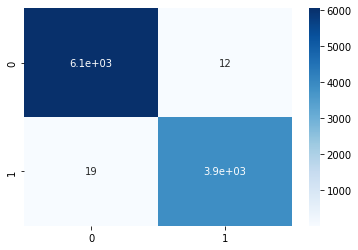

In [ ]:
import seaborn as sns

sns.heatmap(conf_matrix, annot=True, cmap='Blues')


In [ ]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.4/572.4 KB 15.3 MB/s eta 0:00:00


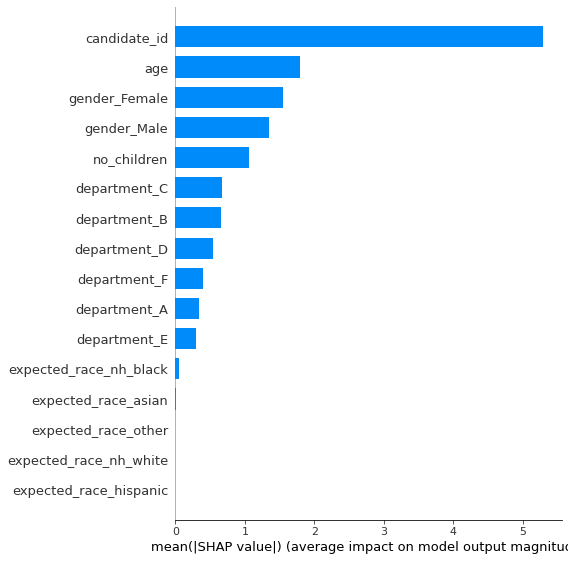

In [ ]:
import shap

# Create the SHAP explainer object
explainer = shap.Explainer(model)

# Generate SHAP values
shap_values = explainer(X)

# Plot summary of SHAP values
shap.summary_plot(shap_values, X, plot_type="bar")
### Candidate ID is a significant feature which shows that this artficial key is somehow affecting the final outcome of the interview.
### This outcome is not straightforward and should be investigated.
### Expected racial classification is not statistically significant, thus racial attitude is not significant for the company and we can assume that all races are treated equally or the approximation of races is not reliable.

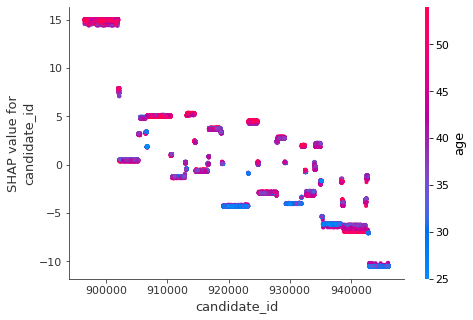

In [ ]:
import shap

# create SHAP values
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)

# create dependence plot
shap.dependence_plot("candidate_id", shap_values, X)


In [ ]:
# import matplotlib.pyplot as plt

# feature1 = 'age'
# feature2 = 'candidate_id'
# shap.dependence_plot((feature1, feature2), shap_values[0], X_test, interaction_index=None, show=False)
# plt.title("Interaction between age and income on target variable")
# plt.show()

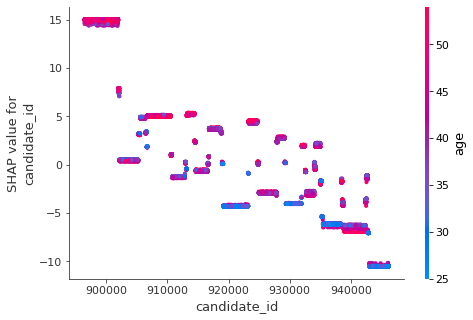

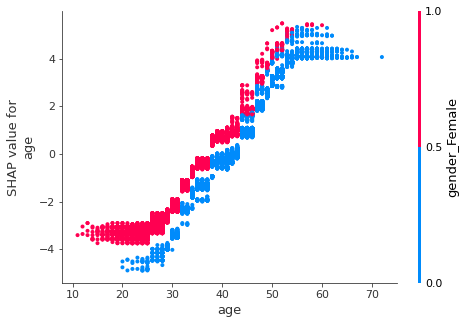

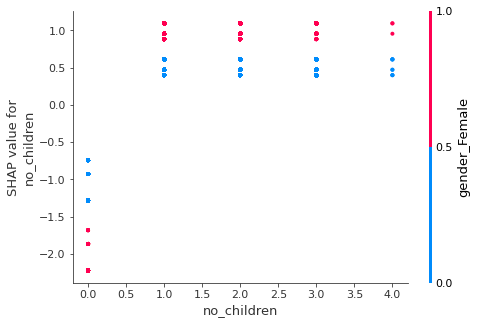

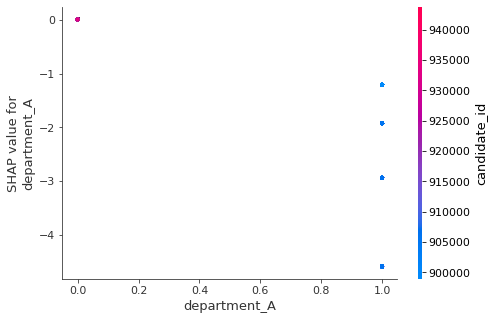

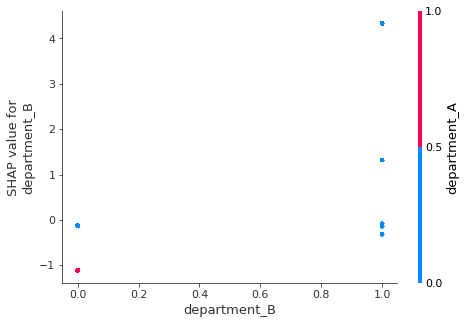

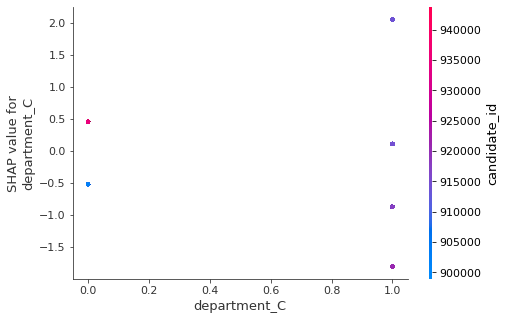

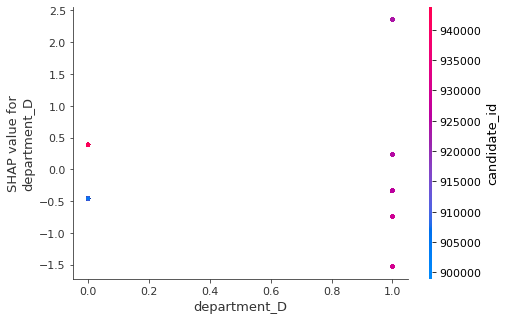

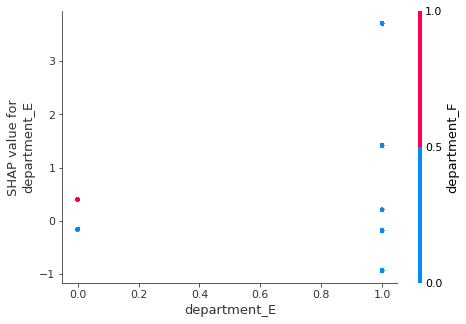

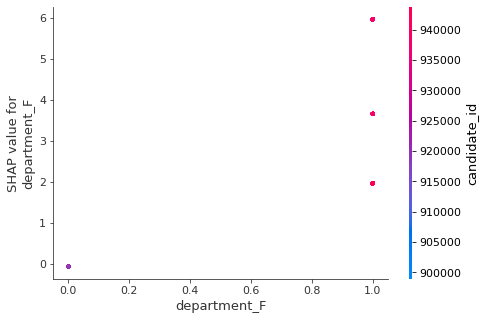

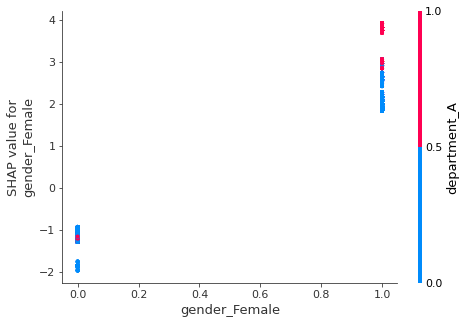

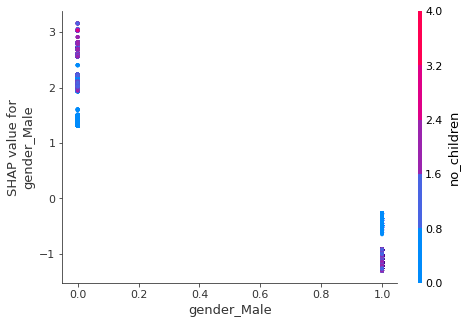

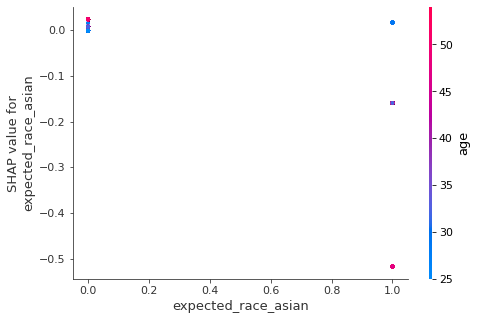

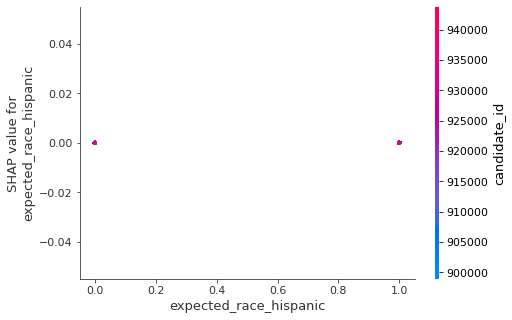

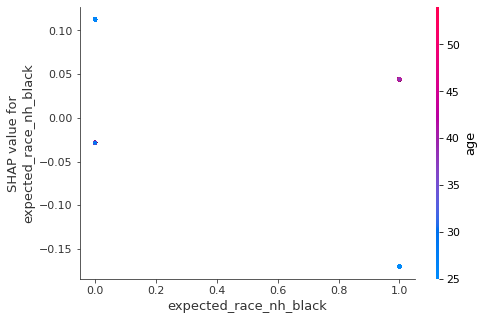

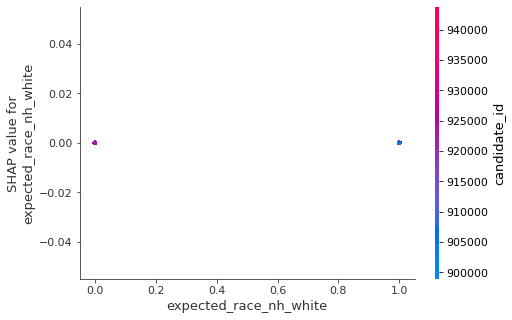

In [ ]:
for i in range(0,len(X.columns)-1):
    shap.dependence_plot(i, shap_values, X)


In [ ]:
import shap

# create SHAP values
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)
shap.initjs()

# create force plot
for i in range(1,max(df_joined.count())):
    if i <= 10:
        shap.initjs()
        print(df_joined.iloc[i,:])
        display(shap.force_plot(explainer.expected_value, shap_values[i,:], X.iloc[i,:]))
    else:
        pass

candidate_id       910365
department              B
admit            Admitted
age                  44.0
gender               Male
no_children           0.0
emp_card_id        1010.0
expected_race    nh_black
Name: 1, dtype: object


candidate_id       927783
department              D
admit            Rejected
age                  48.0
gender               Male
no_children           1.0
emp_card_id           NaN
expected_race    nh_white
Name: 2, dtype: object


candidate_id       899904
department              A
admit            Admitted
age                  46.0
gender               Male
no_children           3.0
emp_card_id        2349.0
expected_race    nh_black
Name: 3, dtype: object


candidate_id       931437
department              D
admit            Rejected
age                  31.0
gender             Female
no_children           0.0
emp_card_id           NaN
expected_race    nh_white
Name: 4, dtype: object


candidate_id       909317
department              B
admit            Admitted
age                  52.0
gender               Male
no_children           1.0
emp_card_id           NaN
expected_race    nh_white
Name: 5, dtype: object


candidate_id       905025
department              A
admit            Rejected
age                  37.0
gender               Male
no_children           1.0
emp_card_id           NaN
expected_race    nh_white
Name: 6, dtype: object


candidate_id       940069
department              F
admit            Rejected
age                  41.0
gender               Male
no_children           1.0
emp_card_id           NaN
expected_race    nh_white
Name: 7, dtype: object


candidate_id       927754
department              D
admit            Rejected
age                  38.0
gender               Male
no_children           2.0
emp_card_id           NaN
expected_race    nh_black
Name: 8, dtype: object


candidate_id       908667
department              B
admit            Admitted
age                  48.0
gender               Male
no_children           2.0
emp_card_id        5169.0
expected_race       asian
Name: 9, dtype: object


candidate_id       916943
department              C
admit            Admitted
age                  34.0
gender             Female
no_children           1.0
emp_card_id         245.0
expected_race       asian
Name: 10, dtype: object


In [ ]:
df_joined.count()

candidate_id     49785
department       49785
admit            49785
age              49785
gender           49785
no_children      49785
emp_card_id      17421
expected_race    49785
dtype: int64

candidate_id       933951
department              E
admit            Rejected
age                  43.0
gender               Male
no_children           2.0
emp_card_id           NaN
expected_race    nh_black
Name: 0, dtype: object

In [ ]:
y_pred_prob = model.predict_proba(X_test)[:, 1]

In [ ]:
y_pred_prob

array([9.87127666e-01, 7.64628555e-04, 1.83962885e-05, ...,
       8.27724638e-03, 7.77475484e-03, 9.57629543e-01])

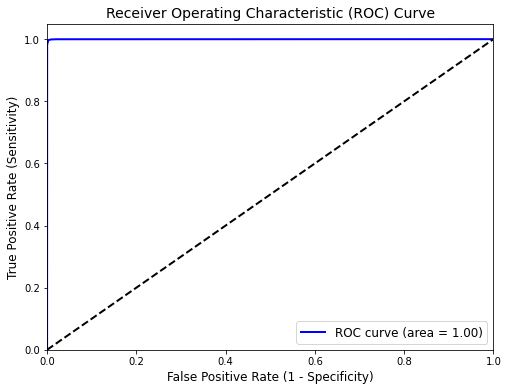

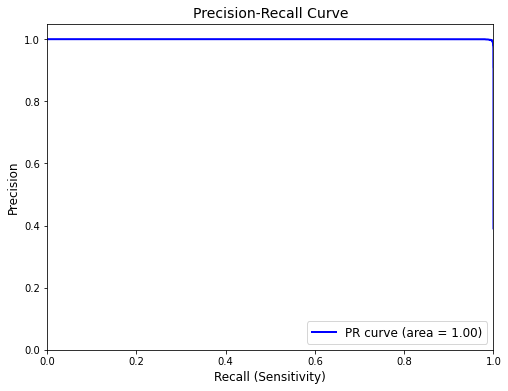

In [ ]:
from sklearn.metrics import roc_curve, precision_recall_curve, auc
import matplotlib.pyplot as plt

# Assuming y_test and y_pred_prob are the true labels and predicted probabilities of a binary classification problem

# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)', fontsize=12)
plt.ylabel('True Positive Rate (Sensitivity)', fontsize=12)
plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=14)
plt.legend(loc="lower right", fontsize=12)
plt.show()

# Precision-Recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)
pr_auc = auc(recall, precision)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2, label='PR curve (area = %0.2f)' % pr_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall (Sensitivity)', fontsize=12)
plt.ylabel('Precision', fontsize=12)
plt.title('Precision-Recall Curve', fontsize=14)
plt.legend(loc="lower right", fontsize=12)
plt.show()
